In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [4]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse
 

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)
 

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise
 

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander
 

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference
 

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]
 

    return ecg_data
 

ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference
    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)


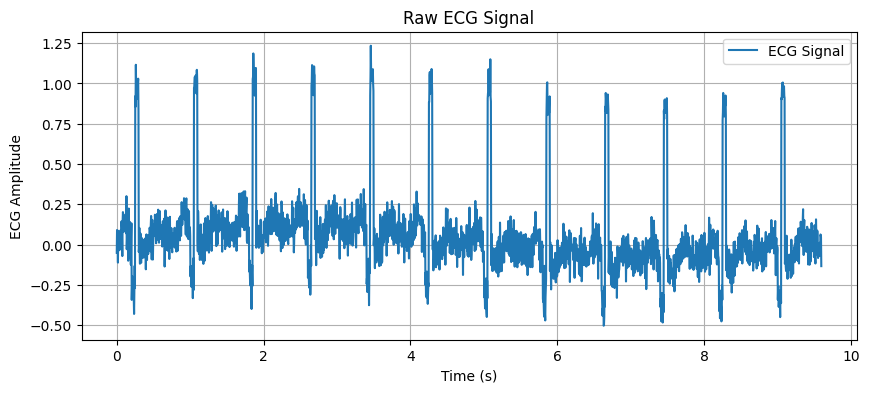

In [5]:
# Generate ECG data
sampling_rate = 250  # Hz
duration = 10  # seconds
ecg_data = generate_ecg_data(duration, sampling_rate)

# Compute time array
time = np.arange(len(ecg_data)) / sampling_rate

# Plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_data, label="ECG Signal")
plt.title("Raw ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.grid(True)
plt.legend()
plt.show()

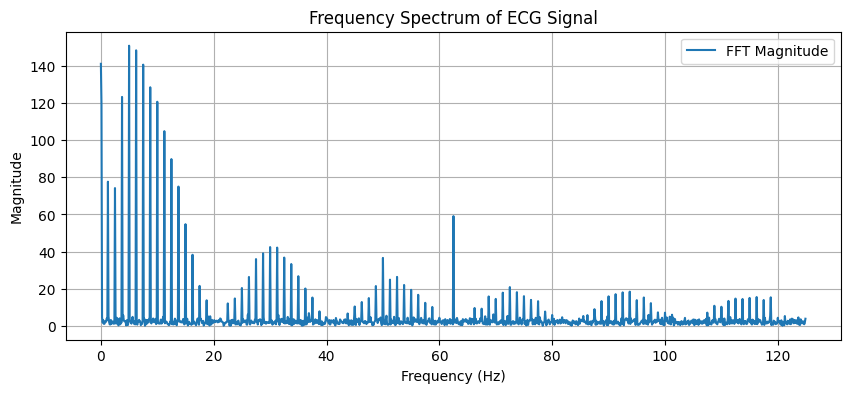

In [6]:
# Compute the Fourier Transform of the ECG signal
ecg_fft = fft(ecg_data)
n = len(ecg_data)  # Number of samples
freq = np.fft.fftfreq(n, d=1/sampling_rate)  # Frequency array

# Take only the positive frequencies
positive_freqs = freq[:n//2]
magnitude = np.abs(ecg_fft[:n//2])  # Magnitude of the FFT

# Plot the magnitude of the Fourier Transform
plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, magnitude, label="FFT Magnitude")
plt.title("Frequency Spectrum of ECG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()


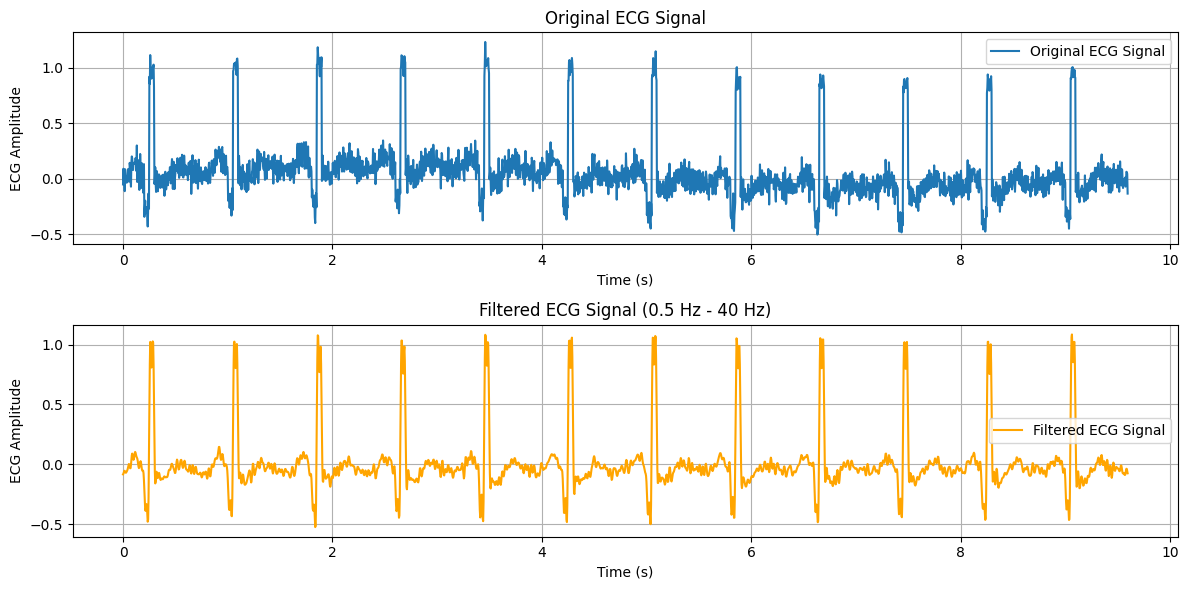

In [7]:
# Define the frequency range for the bandpass filter
low_cutoff = 0.5  # Hz
high_cutoff = 40.0  # Hz

# Compute the Fourier Transform of the ECG signal
ecg_fft = fft(ecg_data)
n = len(ecg_data)  # Number of samples
freq = np.fft.fftfreq(n, d=1/sampling_rate)  # Frequency array

# Create a bandpass filter mask
bandpass_mask = (np.abs(freq) >= low_cutoff) & (np.abs(freq) <= high_cutoff)

# Apply the mask to the Fourier-transformed signal
filtered_fft = ecg_fft * bandpass_mask

# Reconstruct the filtered ECG signal using the inverse Fourier Transform
filtered_ecg = np.real(ifft(filtered_fft))

# Plot the original and filtered ECG signals
plt.figure(figsize=(12, 6))

# Original ECG signal
plt.subplot(2, 1, 1)
plt.plot(time, ecg_data, label="Original ECG Signal")
plt.title("Original ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.grid(True)
plt.legend()

# Filtered ECG signal
plt.subplot(2, 1, 2)
plt.plot(time, filtered_ecg, label="Filtered ECG Signal", color="orange")
plt.title("Filtered ECG Signal (0.5 Hz - 40 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Heart Rate: 75.17 BPM


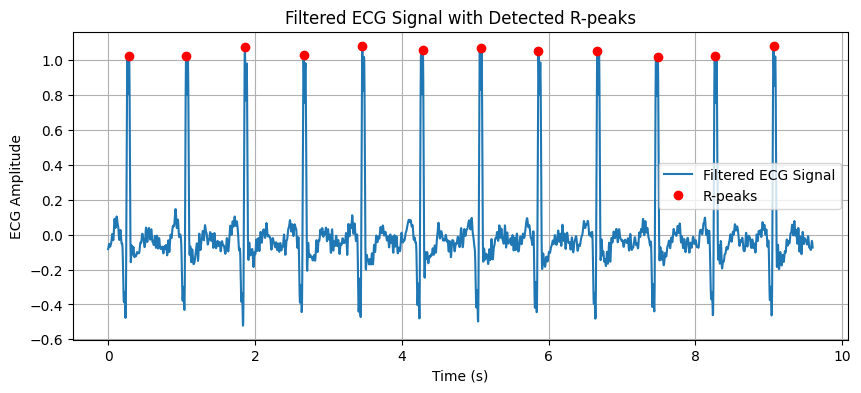

In [8]:
# Detect R-peaks in the filtered ECG signal
peaks, _ = find_peaks(filtered_ecg, height=0.5, distance=sampling_rate*0.6)  # Adjust height and distance as needed

# Calculate the time intervals between successive R-peaks
r_peak_intervals = np.diff(peaks) / sampling_rate  # Convert intervals to seconds

# Compute the heart rate in beats per minute (BPM)
average_interval = np.mean(r_peak_intervals)  # Average interval between R-peaks
heart_rate = 60 / average_interval  # BPM

# Print the calculated heart rate
print(f"Heart Rate: {heart_rate:.2f} BPM")

# Plot the filtered ECG signal with detected R-peaks
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_ecg, label="Filtered ECG Signal")
plt.plot(time[peaks], filtered_ecg[peaks], 'ro', label="R-peaks")
plt.title("Filtered ECG Signal with Detected R-peaks")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.grid(True)
plt.legend()
plt.show()